In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [2]:
data=pd.read_csv("crack_detection.csv")

In [3]:
data.head()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   mean_r      700 non-null    float64
 2   std_r       700 non-null    float64
 3   kur_r       700 non-null    float64
 4   skew_r      700 non-null    float64
 5   mean_g      700 non-null    float64
 6   std_g       700 non-null    float64
 7   kur_g       700 non-null    float64
 8   skew_g      700 non-null    float64
 9   mean_b      700 non-null    float64
 10  std_b       700 non-null    float64
 11  kur_b       700 non-null    float64
 12  skew_b      700 non-null    float64
 13  entropy_r   700 non-null    float64
 14  entropy_g   700 non-null    float64
 15  contrast_r  700 non-null    float64
 16  contrast_g  700 non-null    float64
 17  contrast_b  700 non-null    float64
 18  corr_rg     700 non-null    float64
 19  corr_rb     700 non-null    f

In [5]:
data['label'].value_counts()

0    351
1    349
Name: label, dtype: int64

In [6]:
data.shape

(700, 25)

In [7]:
data.isnull().sum()

Unnamed: 0    0
mean_r        0
std_r         0
kur_r         0
skew_r        0
mean_g        0
std_g         0
kur_g         0
skew_g        0
mean_b        0
std_b         0
kur_b         0
skew_b        0
entropy_r     0
entropy_g     0
contrast_r    0
contrast_g    0
contrast_b    0
corr_rg       0
corr_rb       0
corr_gb       0
moment_r      0
moment_g      0
moment_b      0
label         0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,349.50000,129.904131,29.725915,0.783304,0.210021,129.513118,28.191406,0.905234,0.210064,128.842019,...,9.185198,178.245714,173.781429,170.375714,0.984945,0.982444,0.958198,978.008986,880.738813,0.498571
std,202.21688,22.533741,9.721830,2.921148,0.832188,20.781828,9.279358,3.000051,0.848674,19.436542,...,0.018515,33.888983,34.655417,35.610478,0.024409,0.027450,0.069144,565.834008,520.580605,0.500355
min,0.00000,72.085700,5.257114,-1.616288,-3.788320,78.022200,4.543611,-1.567842,-3.761659,82.738400,...,9.085941,55.000000,48.000000,52.000000,0.731441,0.740211,0.279195,27.637244,20.644398,0.000000
25%,174.75000,117.223100,21.865794,-0.520055,-0.251850,118.032050,20.951718,-0.460405,-0.247178,118.039500,...,9.177954,152.750000,150.000000,146.000000,0.984907,0.982613,0.957100,478.115830,438.975044,0.000000
50%,349.50000,127.525400,31.030772,-0.071472,0.211199,127.457500,29.333898,-0.011488,0.202783,126.579200,...,9.188351,184.500000,179.000000,175.000000,0.991413,0.989603,0.974893,962.908945,860.477925,0.000000
75%,524.25000,140.418825,37.210949,1.042058,0.593044,138.861175,34.737146,1.177957,0.613642,136.463700,...,9.199160,202.000000,197.000000,193.250000,0.994256,0.993197,0.983471,1384.654910,1206.669310,1.000000
max,699.00000,207.160800,52.226058,44.499978,5.645803,198.134400,51.168733,44.984072,5.623845,196.270800,...,9.209413,255.000000,254.000000,255.000000,0.998194,0.998387,0.997126,2727.561173,2618.239239,1.000000


In [9]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1:].values

In [10]:
print([X.shape,Y.shape])

[(700, 24), (700, 1)]


In [11]:
def normalize(X):
  return (X - np.mean(X,axis = 0))/np.std(X,axis = 0)
X = normalize(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(560, 24)

In [14]:
X_test.shape

(140, 24)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [16]:
model.fit(X_train,y_train.ravel())

LogisticRegression()

In [17]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [18]:
model.score(X_test,y_test)

0.8785714285714286

c:\Users\u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


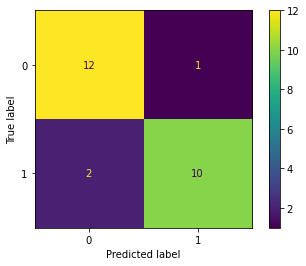

In [19]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
         X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
 

In [20]:
True_positives=12
True_negatives=10
False_negatives=1
False_positives=2
Sum=True_positives+True_negatives+False_negatives+False_positives

In [21]:
Accuracy=(True_positives+True_negatives)/Sum
Accuracy

0.88

In [22]:
precision=True_positives/(True_positives+False_positives)
precision

0.8571428571428571

In [23]:
recall=True_positives/(True_positives+False_negatives)
recall

0.9230769230769231

In [24]:
F_score=(2*precision*recall)/(precision+recall)
F_score

0.888888888888889